In [46]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, ttest_ind, normaltest, shapiro
from scipy.stats import pearsonr

In [32]:
# loading datasets
deaths = pd.read_csv('./spain-region-data/deaths.csv')
hospitalized = pd.read_csv('./spain-region-data/hospitalized.csv')
recovered = pd.read_csv('./spain-region-data/recovered.csv')
cases = pd.read_csv('./spain-region-data/cases.csv')
icu = pd.read_csv('./spain-region-data/icu.csv')
demographics = pd.read_csv('./spain-region-data/demographics.csv')

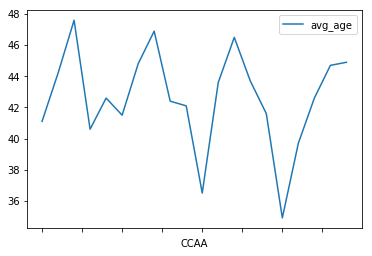

In [33]:
# plotting demographics
plt.figure()
demographics.set_index('CCAA')['avg_age'].plot()
plt.legend(loc='best')

In [34]:
# New dataframe for totals case calculation
totals = cases.loc[cases['date']=='2020-04-15']
totals['total']
del totals['date']
totals.columns=['code','CCAA','cases']
totals['deaths']= deaths.loc[deaths['date']=='2020-04-15']['total'].tolist()
totals['hospitalized']= hospitalized.loc[hospitalized['date']=='2020-04-15']['total'].tolist()
totals['icu']= icu.loc[icu['date']=='2020-04-15']['total'].tolist()
# totals['hospitalized'].loc['979':] = totals['hospitalized'].sum()

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [41]:
# Calculating Fractions
totals['frac_hospitalized'] = totals['hospitalized']/totals['cases']
totals['frac_deaths'] = totals['deaths']/totals['cases']
totals['frac_icu'] = totals['icu']/totals['cases']
totals.set_index('CCAA',inplace=True)
demographics.set_index('CCAA',inplace=True)

#add demographics to database
totals['avg_age'] = demographics['avg_age'].tolist()
totals['pop_density'] = demographics['pop_density'].tolist()
totals['population'] = demographics['population'].tolist()
print(totals)

                    code   cases  deaths  hospitalized     icu  \
CCAA                                                             
Andalucía              1   10595     865        5147.0   665.0   
Aragón                 2    4338     514        2006.0   282.0   
Asturias               3    2096     166        1387.0   114.0   
Baleares               4    1606     125         857.0   149.0   
Canarias               5    1975     104         781.0   152.0   
Cantabria              6    1823     132         873.0    76.0   
Castilla-La Mancha     8   14680    1755        7896.0   495.0   
Castilla y León        7   13697    1337        6306.0   306.0   
Cataluña               9   36505    3756       23372.0  2789.0   
Ceuta                 18      98       4           9.0     4.0   
C. Valenciana         10    9424     945        4465.0   588.0   
Extremadura           11    2762     342        1155.0   109.0   
Galicia               12    7708     299        2471.0   128.0   
Madrid    

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [43]:
# Normalcy Tests
print("Cases:")
print(normaltest(totals['cases'].tolist()).pvalue)

print("Deaths:")
print(normaltest(totals['deaths'].tolist()).pvalue)

print("Hospitalized:")
print(normaltest(totals['hospitalized'].tolist()).pvalue)

print("ICU:")
print(normaltest(totals['icu'].tolist()).pvalue)

print("frac_deaths:")
print(normaltest(totals['frac_deaths'].tolist()).pvalue)

print("frac_hospitalized:")
print(normaltest(totals['frac_hospitalized'].tolist()).pvalue)

print("frac_icu:")
print(normaltest(totals['frac_icu'].tolist()).pvalue)

print('Age:')
print(normaltest(totals['avg_age'].tolist()).pvalue)

Cases:
2.4581106162400883e-10
Deaths:
1.027919691344989e-09
Hospitalized:
2.2859985006559294e-10
ICU:
5.435764775260061e-10
frac_deaths:
0.8741662150912002
frac_hospitalized:
0.08806810744359778
frac_icu:
0.5086070028660516
Age:
0.164596591152546


In [49]:
corr, _ = pearsonr(totals['avg_age'].tolist(), totals['frac_icu'].tolist())
print(corr)
corr, _ = pearsonr(totals['avg_age'].tolist(), totals['frac_hospitalized'].tolist())
print(corr)
corr, _ = pearsonr(totals['avg_age'].tolist(), totals['frac_deaths'].tolist())
print(corr)
corr, _ = pearsonr(totals['avg_age'].tolist(), totals['population'].tolist())
print(corr)

-0.42414347281813003
0.08800424432157605
0.15428965200350117
0.17395331566759312


In [26]:
print("Wilcoxon -- avg age and frac_icu:")
print(wilcoxon(totals['avg_age'].tolist(),totals['frac_icu'].tolist()).pvalue)

print("Wilcoxon -- avg age and frac_hospitalized:")
print(wilcoxon(totals['avg_age'].tolist(),totals['frac_hospitalized'].tolist()).pvalue)

print("Wilcoxon -- avg age and frac_deaths:")
print(wilcoxon(totals['avg_age'].tolist(),totals['frac_deaths'].tolist()).pvalue)

print("Wilcoxon -- avg age and population:")
print(wilcoxon(totals['avg_age'].tolist(),totals['population'].tolist()).pvalue)

Wilcoxon -- avg age and frac_icu:
8.857457687863547e-05
Wilcoxon -- avg age and frac_hospitalized:
8.857457687863547e-05
Wilcoxon -- avg age and frac_deaths:
8.857457687863547e-05
Wilcoxon -- avg age and population:
8.857457687863547e-05
